In [12]:
# from fastai.vision.all import 

from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

"""
В датасете присутствуют и кошки и другие биологическеи виды, но
именно кошки маркируются с заглавной буквы!!
Это отличии позволяет проверить метку (название файла) и вернуть
True, где это кошка.
"""
def is_cat(x): return x[0].isupper()

"""
Загрузчик изображений:
Принимает:
    Путь
    Функцию для получения изображений
    Размер контрольной (тестовой) выборки
    Вероятностый параметр
    Функцию, которая маркирует все изображений с кошками как True
    Подгоняет все изоробракжений к размеру 224 пиксела, можно больше и меньше.
"""
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.2,
    seed = 42,
    label_func = is_cat,
    item_tfms = Resize(224)
)

"""
Обучение модели
Выбираем данные и используем модель сверточной нейронной сети
Используем архитектуру resnet34, число 34 означет число словев, можно использовать
и другое количество слоев, но на данном датасевте 34 оптимально.
Метрика которую мы используем для оценивания производительности модели.
"""
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 500, 333])
	Item at index 1 has shape: torch.Size([3, 333, 500])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [3]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
path,
bs=8,
fnames=get_image_files(path/'images'),
label_func=lambda o: path/'labels' / f'{o.stem}_P{o.suffix}',
codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/sergey/PycharmProjects/FastAI_PyTorch/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sergey/PycharmProjects/FastAI_PyTorch/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.674090,2.147175,00:52


epoch,train_loss,valid_loss,time
0,1.666461,1.599524,01:06
1,1.484422,1.265879,00:58
2,1.369478,1.126991,01:00
3,1.287147,1.052332,01:00
4,1.182037,0.953575,00:59
5,1.075889,0.846818,00:58
6,0.990411,0.843395,00:57
7,0.918272,0.807783,00:58


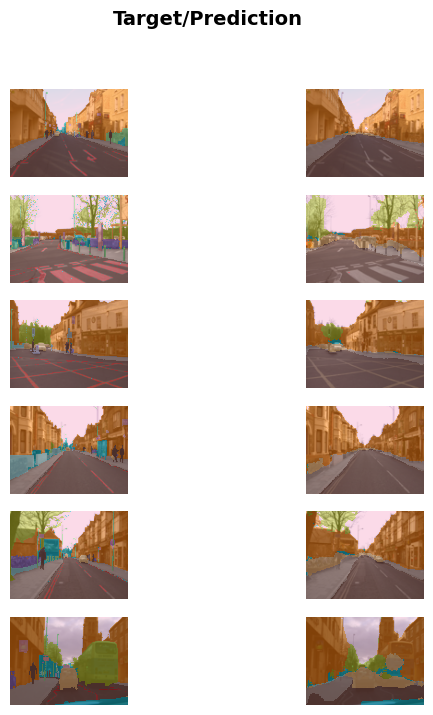

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *
import numpy as np

dls = TextDataLoaders.from_folder(
untar_data(URLs.IMDB),
valid='test')

learn = text_classifier_learner(dls, 
                                AWD_LSTM,
                                drop_mult=0.5,
                                metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465533,0.392697,0.824240,2:24:48


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.predict('I really liked that movie!')
('pos', tensor(1), tensor([0.0041, 0.9959]))

In [1]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv',
    path=path,
    y_names='salary',
    cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names=['age', 'fnlwgt', 'education-num'],
    procs=[Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.382788,0.378523,0.823403,00:11
1,0.372950,0.361308,0.829699,00:04
2,0.350429,0.354332,0.837377,00:05


In [2]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')

learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.501049,1.425689,00:00


epoch,train_loss,valid_loss,time
0,1.371047,1.369838,00:00
1,1.278766,1.194644,00:00
2,1.052071,0.877093,00:00
3,0.819944,0.710517,00:00
4,0.698781,0.661841,00:00
5,0.657405,0.644627,00:00
6,0.626505,0.636980,00:00
7,0.616534,0.632795,00:00
8,0.613824,0.631252,00:00
9,0.603576,0.631027,00:00


In [3]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,73.0,46.0,2.0,3.077377
1,86.0,19.0,3.0,2.625285
2,60.0,76.0,5.0,4.271685
3,33.0,68.0,3.0,3.598618
4,70.0,91.0,3.0,4.187937
5,33.0,22.0,3.5,3.687633
6,30.0,34.0,5.0,3.883666
7,75.0,56.0,5.0,4.485232
8,66.0,43.0,3.0,3.678379


In [11]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

!pip install -Uqq duckduckgo_search
from fastbook import *
from fastai.vision.widgets import *


key = "Y5AW6-ZS4VY-G4RAB-KX88P-W567V"

result = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')

dest = 'images//grizzly.jpg'
download_url(ims[0], dest)
im.to_thumb(128, 128)

bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_urlmi'))

HTTPError: 401 Client Error: PermissionDenied for url: https://api.bing.microsoft.com/v7.0/images/search?q=grizzly+bear&count=150&min_height=128&min_width=128

In [9]:
def search_images_bing(key, term, max_images: int = 100, **kwargs):    
    params = {'q':term, 'count':max_images}
    headers = {"Ocp-Apim-Subscription-Key":key}
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json() 
   
    # returns an L object to be identical to the original function.
    return L(search_results['value'])

# fits in nicely with the original code
results = search_images_bing(key, 'grizzly bear', min_sz=128)
ims = results.attrgot('contentUrl')

HTTPError: 401 Client Error: PermissionDenied for url: https://api.bing.microsoft.com/v7.0/images/search?q=grizzly+bear&count=100